## $\textbf{Distribution Sampling}$

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from astroquery.gaia import Gaia
import seaborn as sn
from tqdm import tqdm

### $\textbf{Importing all Herbig Ae/Be Stars from Vioque M. catalog}$

In [2]:
all_herbig = pd.read_csv("all_herbig star.csv")

### $\textbf{Keeping only required columns from all\_herbig list }$

In [3]:
herbig_star = all_herbig[["Name", "RAICRS", "DEICRS", "Dist", "E_Dist", "e_Dist"]]
herbig_star = herbig_star.sort_values(by='Dist')
herbig_star = herbig_star.reset_index(drop=True)

In [4]:
herbig_star

,Name,RAICRS,DEICRS,Dist,E_Dist,e_Dist
0,HD 39014,86.192917,-65.735556,44.1,1.0,0.9
1,HD 9672,23.657917,-15.676389,57.1,0.5,0.5
2,HD 199603,314.674167,-14.483333,89.3,1.4,1.3
3,HD 163296,269.088750,-21.956111,101.5,2.0,1.9
4,HD 100453,173.272917,-54.324722,104.2,0.7,0.7
...,...,...,...,...,...,...
213,MWC 657,340.674167,60.400278,3164.2,395.6,286.7
214,Hen 3-938,208.178333,-63.546944,3851.6,639.0,449.3
215,HD 305298,158.270833,-60.330833,4039.5,628.2,442.9
216,AS 470,324.059167,57.358611,4039.6,616.9,439.7


#### $\textit{Plotting histogram of herbig star}$

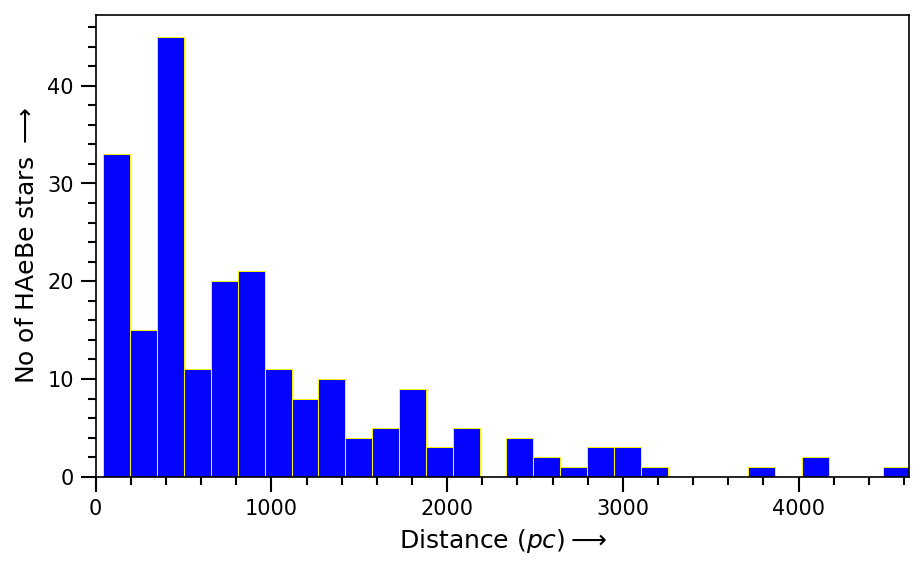

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize = (7, 4))
# plt.title("Distance distribution of Herbig Ae/Be Stars", fontsize = 12)

#---------------------------------------------------------------------------------
#                     IMPORTING HISTOGRAM
"""   EXTRACTING INFORMATON OF HERBIG STAR DISTANCE HISTOGRAM    """

max_num_herbig, herbig_bin, patch = ax.hist(herbig_star["Dist"], bins=30, alpha = 0.99, color = '#0000FF', ec = '#F9F206', linewidth = 0.5)

#---------------------------------------------------------------------------------
ax.set_xlabel(r"Distance $(pc)\longrightarrow$", fontsize = 12)
ax.set_ylabel(r"No of HAeBe stars $\longrightarrow$", fontsize = 12)
ax.minorticks_on()
plt.xlim(0, max(herbig_star["Dist"]))
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='k')
# plt.savefig("Herbig distribution.jpg", dpi=800, bbox_inches='tight')
plt.show()

### $\textbf{Importing Random star}$

In [6]:
all_random = pd.read_csv("test_star.csv")
random_star = all_random[(all_random["parallax_error"] < 0.1)] 
random_star = random_star[(random_star["r_med_photogeo"]> min(herbig_star["Dist"]))& (random_star["r_med_photogeo"] < max(herbig_star["Dist"])+1 )]
random_star = random_star.reset_index(drop=True)


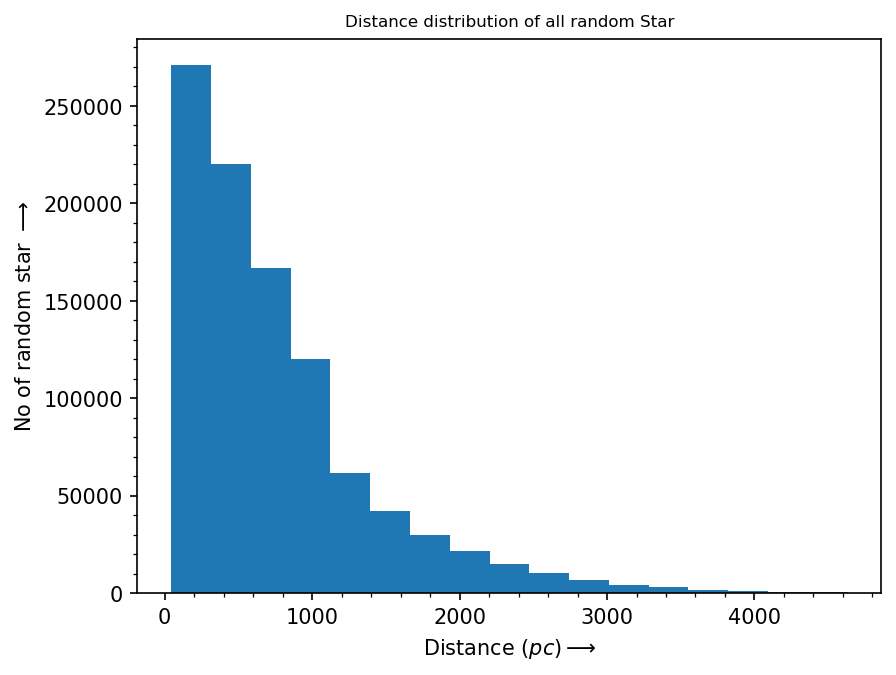

In [7]:

plt.figure(dpi=150)
plt.title("Distance distribution of all random Star", fontsize = 8)
plt.hist(random_star["r_med_photogeo"], bins = 17)
plt.xlabel(r"Distance $(pc)\longrightarrow$")
plt.ylabel(r"No of random star $\longrightarrow$")
plt.minorticks_on()
plt.show()

### $\textbf{Choosing 218 random star same as herbig distance distribution}$

In [8]:
num_star = np.zeros(len(max_num_herbig))
star_bin = herbig_bin
random_star_sample = pd.DataFrame()
sum_star = 0

while sum_star < 10000:
    random_sample = random_star.sample(1, replace= False)

    for i in range(len(max_num_herbig)):
    
        if (random_sample.iloc[0]["r_med_photogeo"] >= herbig_bin[i]) & (random_sample.iloc[0]["r_med_photogeo"] < herbig_bin[i+1]):
            if num_star[i] < (max_num_herbig[i]):
                random_star_sample = pd.concat((random_star_sample, random_sample), axis=0)
                num_star[i] += 1

        
        # print(sum_star)
    if sum(num_star)== sum(max_num_herbig):
        break
    sum_star += 1

            
            
            
            

In [9]:
random_star_sample = random_star_sample.sort_values(by='r_med_photogeo')
random_star_sample = random_star_sample.reset_index(drop=True)

In [10]:
random_star_sample

,source_id,ra,dec,parallax,parallax_error,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,phot_g_mean_mag
0,6684732145111410432,296.177599,-44.713987,18.413472,0.035349,54.210873,54.181213,54.244976,10.518223
1,400708805063542016,21.530391,50.255066,18.498238,0.098866,54.945500,54.639923,55.265728,10.439613
2,669956216039990656,120.081639,18.798147,16.811961,0.069368,58.587050,58.419310,58.770000,10.312886
3,3405371718076189568,74.362221,16.426713,15.204859,0.055674,65.227560,65.140610,65.310320,10.938619
4,2937215747330161920,96.182337,-22.307210,13.511965,0.028440,73.295395,73.234180,73.374176,10.555309
...,...,...,...,...,...,...,...,...,...
213,5876959061463445120,228.716527,-59.025114,0.301444,0.041326,3132.473900,3020.810800,3246.306400,9.722523
214,5339666207548030848,170.318394,-58.127731,0.455557,0.076196,3850.381600,3485.524700,4368.192400,10.594375
215,4497224658954072704,271.843300,13.341191,0.248869,0.050720,4029.853500,3799.916700,4318.653300,10.834906
216,5526933348666131584,127.928991,-41.228943,0.197309,0.026239,4088.803500,3900.567100,4320.875500,10.931484


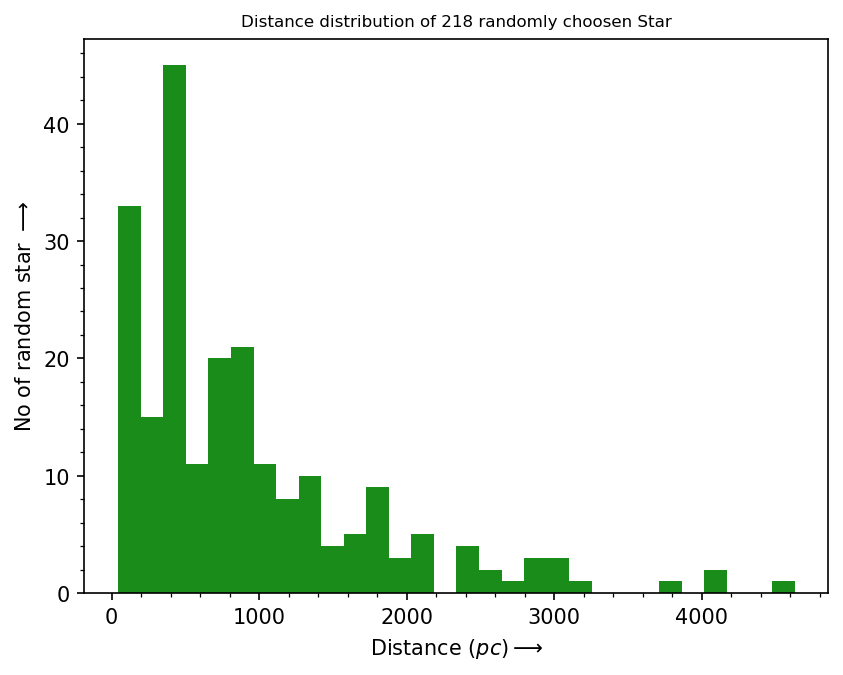

In [11]:

plt.figure(dpi=150)
plt.title("Distance distribution of 218 randomly choosen Star", fontsize = 8)
# histogram of the 218 randomly choosen star from our sample
plt.hist(random_star_sample['r_med_photogeo'], bins=herbig_bin, color = 'green', alpha = 0.9, ls = 'dotted')

# histogram of all 218 Herbig Ae/Be star
#plt.hist(herbig_star["Dist"], bins= herbig_bin, color = 'red', alpha = 0.8, ls = 'dashed')
plt.xlabel(r"Distance $(pc)\longrightarrow$")
plt.ylabel(r"No of random star $\longrightarrow$")
plt.minorticks_on()
plt.show()

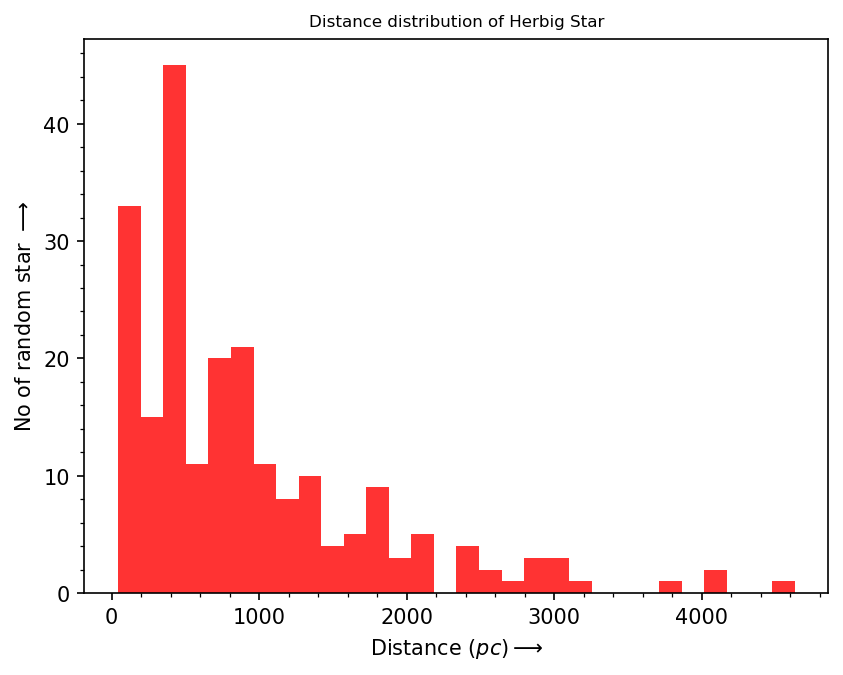

In [12]:

plt.figure(dpi=150)
plt.title("Distance distribution of Herbig Star", fontsize = 8)
# histogram of the 218 randomly choosen star from our sample
#plt.hist(random_star_sample['r_med_photogeo'], bins=herbig_bin, color = 'green', alpha = 0.9, ls = 'dotted')

# histogram of all 218 Herbig Ae/Be star
plt.hist(herbig_star["Dist"], bins= herbig_bin, color = 'red', alpha = 0.8, ls = 'dashed')
plt.xlabel(r"Distance $(pc)\longrightarrow$")
plt.ylabel(r"No of random star $\longrightarrow$")
plt.minorticks_on()
plt.show()

### $ \bm{\textbf{Extracting data from the gaia table around a star having ra and dec}}$

In [13]:
# defining a function for extracting data of stars from GAIA database around a choosen Object(Star or Herbig Ae/Be star)

# The function will take input query size, ra, dec of the centered boject and radius of the circle
# It will give output of ojects around that star in table form

def get_gaia_result(query_size, ra_obj, dec_obj, radius_deg):
    #from astroquery.gaia import Gaia

    query = """SELECT TOP {}""".format(query_size) + """
        g.source_id, g.ra, g.dec, g.parallax, g.parallax_error, d3.r_med_geo, d3.r_lo_geo, d3.r_hi_geo, (d3.r_hi_geo - d3.r_lo_geo)/(2*d3.r_med_geo) AS sigma_geo, d3.r_med_photogeo, d3.r_lo_photogeo, d3.r_hi_photogeo,
        (d3.r_hi_photogeo - d3.r_lo_photogeo)/(d3.r_med_photogeo) AS sigma_photogeo, g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag, g.bp_rp, g.phot_g_mean_mag + 5*log10(g.parallax) - 10 AS mv,
        w.w1mpro, w.w2mpro, w.w3mpro, w.w4mpro, tt.j_m, tt.h_m, tt.ks_m
        FROM gaiadr2.gaia_source as g, gaiadr2.allwise_best_neighbour as x, allwise_original_valid as w, gaiadr2.tmass_best_neighbour as t, tmass_original_valid as tt, external.gaiaedr3_distance AS d3
        WHERE CONTAINS(POINT(g.ra, g.dec), CIRCLE({}""".format(ra_obj) + """, {}""".format(dec_obj)+""", {}""".format(radius_deg) + """ )) = 1 AND g.parallax > 0.0 AND
        g.parallax IS NOT NULL AND g.bp_rp IS NOT NULL AND ((g.source_id = x.source_id AND x.allwise_oid = w.allwise_oid) AND (g.source_id = t.source_id AND t.tmass_oid = tt.tmass_oid)) AND (g.source_id = d3.source_id)
        """

    job = Gaia.launch_job(query)
    result = job.get_results()

    return result



In [14]:
# importing csv file of 1m sources containing Gaia data for plotting HR diagram
filename = '1M.csv'
df1 = pd.read_csv(filename)

# filtering data on the basis of parallax error so that we can get better observed sources
df = df1[df1['parallax_error']< 0.1]
df = df.reset_index(drop=True)


gk_1m = df["phot_g_mean_mag"] - df["ks_m"]
mg = df["mg"]

In [15]:
y_values1 = np.linspace(1, 4.5, 50)
y_values2 = np.linspace(4.5, 8.5, 100)
y_values3 = np.linspace(8.5, 14.0, 100)

### $\textbf{Counting function}$

#### $\textbf{Boundary Equation}$

In [16]:
# Defining the equation of straight line for the boundries

#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------


def equation1(y):
    # y = 1 - 5 * (x - 2.5)
    x = 2.5 - 1.0/5.0 * (y - 1)
    return x

def equation2(y):
    # y = 4.5 + 4.0/1.9 * (x - 1.8)
    x = 1.8 + 1.9/4.0 * (y - 4.5)
    return x

def equation3(y):
    #y = 8.5 + 40/9 * (x - 3.7)
    x = 3.7 + 9.0/40.0 * (y - 8.5)
    return x


#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------

In [17]:
# Defining a function which will count red object
# just we need to pass list of object(stars) with G-K as X- coordinate and Absolute Magnitude(Mv) as Y-coordinate 

def counting_fun(her_mg, her_gk):

    count_red = 0

    for i in range(len(her_mg)):

        if her_mg[i] <= 4.5:
            if her_gk[i] >= equation1(her_mg[i]):
                count_red = count_red + 1
        
        elif 4.5 < her_mg[i] and her_mg[i] <= 8.5:
            if her_gk[i] >= equation2(her_mg[i]):
                count_red = count_red + 1

        elif 8.5 < her_mg[i]:
            if her_gk[i] >= equation3(her_mg[i]):
                count_red = count_red + 1


    return count_red

In [18]:
def plot_function(list_star, index_star):


    ra = list_star["RAICRS"][index_star]

    dec = list_star["DEICRS"][index_star]
    Dist = list_star["Dist"][index_star]
    E_Dist = list_star["E_Dist"][index_star]
    e_dist = list_star["e_Dist"]


    rad = 6.0 
    result = get_gaia_result(10000, ra, dec, rad/60.0)
    result = result.to_pandas()
    result = result[result["parallax_error"] < 0.3]


    res_gk = result["phot_g_mean_mag"] - result["ks_m"]
    res_mg = result["mv"]
    red_star = counting_fun(res_mg, res_gk)
    
    fig = plt.figure(figsize=(10,12), dpi=125)
    grid = plt.GridSpec(5, 3, wspace=0.4, hspace=0.4)
    # make subplots
    ax1 = plt.subplot(grid[0:3, 0:2])
    ax2 = plt.subplot(grid[3, 0:])
    ax3 = plt.subplot(grid[4, 0:])

    
    ax1.set_title("For star, Source_id/Name = {}".format(id), fontsize = 8)
    ax1.scatter(gk_1m, mg, c = 'blue', s=1, alpha=0.3)
    ax1.scatter(res_gk, res_mg, c = 'red', s = 5, label = 'red star = {}'.format(red_star))
    ax1.minorticks_on()
    ax1.grid(True)
    ax1.legend()
    ax1.set_ylim(max(df.mg)+1, -5)
    ax1.set_xlabel(r"$G - K~~\longrightarrow$", fontsize = 8)
    ax1.set_ylabel(r"Absolute Magnitude (G)$\longrightarrow$", fontsize = 7)
    ax1.plot(equation1(y_values1), y_values1,  color = 'orange')
    ax1.plot(equation2(y_values2), y_values2,  color = 'orange')
    ax1.plot(equation3(y_values3), y_values3, color = 'orange')

    

    ax2.scatter(result["r_med_photogeo"], result["ra"], c = 'red', s = 5)
    ax2.scatter(Dist, ra, c = 'blue', s = 10)
    ax2.set_xlabel(r"Distance in parsec $\longrightarrow$", fontsize = 6)
    ax2.set_ylabel(r"ra $\longrightarrow$")
    
    # Filtering out the value 
    # result = result.to_pandas()
    sigma_herb = (E_Dist + e_dist)/2

    result = result[abs(result["r_med_geo"] - Dist) < (2.0*np.sqrt(((result["r_hi_geo"] - result["r_lo_geo"])/2.0 )**2 + sigma_herb**2 ))]
           
    
    res_gk = result["phot_g_mean_mag"] - result["ks_m"]
    res_mg = result["mv"]
    red_star = counting_fun(res_mg, res_gk)

    #ax3.set_title("Stars after filterig out distance error, dist_error < {}".format(frac), fontsize = 6)
    ax3.scatter(result["r_med_photogeo"], result["ra"], c = 'green', s = 5, label = "No. of red star = {}".format(red_star))
    ax3.scatter(Dist, ra, c = 'blue', s = 10)
    ax3.set_xlabel(r"Distance in parsec $\longrightarrow$", fontsize = 8)
    ax3.set_ylabel(r"ra $\longrightarrow$", fontsize = 8)
    ax3.legend()
    ax2.minorticks_on()
    ax3.minorticks_on()
    plt.show()

In [19]:
# plot_function(herbig_star, 3)

### $\textbf{Defining a function for finding fraction of red star surrounding to main source within some search radius}$

In [20]:
def final_result(herbig_star_list, random_star_list, search_radius):
    

    def list_red_object(radius):

        num_tot_star_her = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
        num_red_star_her = []   # For red object around Herbig Ae/Be star
        num_tot_star_rand = []  # For toatal star around random star
        num_red_star_rand = []  # For red objec around the Random Star

        # After  distance filter

        after_num_tot_star_her = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
        after_num_red_star_her = []   # For red object around Herbig Ae/Be star
        after_num_tot_star_rand = []  # For toatal star around random star
        after_num_red_star_rand = []  # For red objec around the Random Star
        


        for i in tqdm(range(herbig_star_list.shape[0])):

            herbig_star = get_gaia_result(1000, herbig_star_list.loc[i][1], herbig_star_list.loc[i][2], radius)
            # Filtering out stars on the basis of parallax error
            herbig_star = herbig_star[herbig_star["parallax_error"] < 0.3]
            her_mg = herbig_star["mv"]
            her_gk = herbig_star["phot_g_mean_mag"] - herbig_star["ks_m"]

            # Considering only those sources which lies within the 2*sigma distance error of the main source.

            sigma_herb = (herbig_star_list["e_Dist"][i] + herbig_star_list["E_Dist"][i])/2
            y1 = herbig_star_list["Dist"][i] - 2 *sigma_herb
            y2 = herbig_star_list["Dist"][i] + 2 *sigma_herb

            after_herbig = herbig_star#[herbig_star["dist_frac"] < 0.2]
            after_herbig = after_herbig[(after_herbig["r_med_photogeo"] > y1) & (after_herbig["r_med_photogeo"] < y2)]
            her_mg_af = after_herbig["mv"]
            her_gk_af = after_herbig["phot_g_mean_mag"] - after_herbig["ks_m"]


            
            #-----------------------------------------------------------------------------
            rand_star = get_gaia_result(1000, random_star_list.loc[i][1], random_star_list.loc[i][2], radius)
            rand_star = rand_star[rand_star["parallax_error"] < 0.3]
            rand_mg = rand_star["mv"]
            rand_gk = rand_star["phot_g_mean_mag"] - rand_star["ks_m"]

            # -----------------------------------------
            sigma_star = (random_star_list["r_hi_photogeo"][i] - random_star_list["r_lo_photogeo"][i])/2
            x1 = random_star_list["r_med_photogeo"][i] - 2 *sigma_star
            x2 = random_star_list["r_med_photogeo"][i] + 2 *sigma_star
            after_star = rand_star#[rand_star["dist_frac"] < 0.2]
            after_star = after_star[(after_star["r_med_photogeo"] > x1) & (after_star["r_med_photogeo"] < x2)]
        
            rand_mg_af = after_star["mv"]
            rand_gk_af = after_star["phot_g_mean_mag"] - after_star["ks_m"]
            
            #--------------------------------------------------------------------------------

            
            """ Counting Red Object around a Herbig Ae/Be Star"""

            her_red_star = counting_fun(her_mg, her_gk)

            num_tot_star_her.append(len(her_mg))
            num_red_star_her.append(her_red_star)


            af_her_red = counting_fun(her_mg_af, her_gk_af)
            after_num_tot_star_her.append(len(her_mg_af))
            after_num_red_star_her.append(af_her_red)


            """ Counting Red Object around a Random Star"""
            
            rand_red_star = counting_fun(rand_mg, rand_gk)
            num_tot_star_rand.append(len(rand_mg))
            num_red_star_rand.append(rand_red_star)


            af_star_red = counting_fun(rand_mg_af, rand_gk_af)
            after_num_tot_star_rand.append(len(rand_mg_af))
            after_num_red_star_rand.append(af_star_red)



        return num_red_star_her, num_tot_star_her, num_red_star_rand, num_tot_star_rand, after_num_red_star_her, after_num_tot_star_her, after_num_red_star_rand, after_num_tot_star_rand
        

    rad_arcmin = search_radius
    all_list = list_red_object(rad_arcmin/60.0)
    
    # -----------------------------------------------------------------------
    num_red_star_her = all_list[0]
    num_tot_star_her = all_list[1]
    num_red_star_rand = all_list[2]
    num_tot_star_rand = all_list[3]
    af1 = all_list[4]
    af2 = all_list[5]
    af3 = all_list[6]
    af4 = all_list[7]


    #-----------------------------------------------------------------------------

    # Creating list for storing the fractional values of red star after and before the distance filter

    frac_before_herb = []
    frac_before_rand = []
    frac_after_herb = []
    frac_after_rand = []

    for i in range(len(num_red_star_her)):

        # THIS IS FOR HERBIG STARS
        if num_tot_star_her[i] == 0:
            f1 = 0.0
            frac_before_herb.append(f1)

        else:
            f1 = num_red_star_her[i]/num_tot_star_her[i]
            frac_before_herb.append(f1)
        


        if af2[i] == 0:
            f1 = 0.0
            frac_after_herb.append(f1)
        
        else:
            f1 = af1[i]/af2[i]
            frac_after_herb.append(f1)


        # THIS IS FOR RANDOM STAR

        if num_tot_star_rand[i] == 0:
            f1 = 0.0
            frac_before_rand.append(f1)

        else:
            f1 = num_red_star_rand[i]/num_tot_star_rand[i]
            frac_before_rand.append(f1)
        


        if af4[i] == 0:
            f1 = 0.0
            frac_after_rand.append(f1)
        
        else:
            f1 = af3[i]/af4[i]
            frac_after_rand.append(f1)

    
    her_avg_frac_bf = np.average(frac_before_herb)
    her_avg_frac_af = np.average(frac_after_herb)

    rnd_avg_frac_bf = np.average(frac_before_rand)
    rnd_avg_frac_af = np.average(frac_after_rand)


    return frac_before_herb, frac_after_herb, frac_before_rand, frac_after_rand

    

In [22]:
result = final_result(herbig_star, random_star_sample, 6.0)

100%|██████████| 218/218 [11:02<00:00,  3.04s/it]


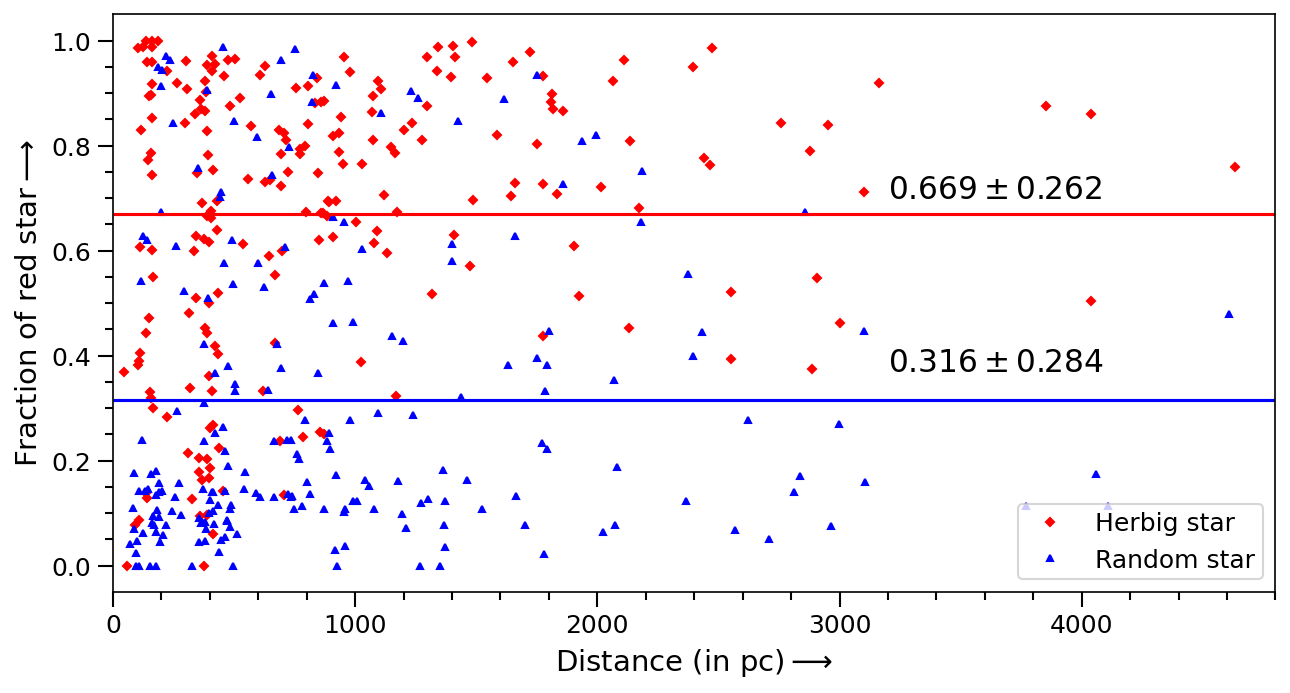

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize = (10, 5))
ax.plot(herbig_star["Dist"],result[0], linestyle = ' ', marker = "D",markersize = 3, color = 'red', label = 'Herbig star')
ax.plot(random_star_sample["r_med_photogeo"], result[2], linestyle = ' ', marker = "^", markersize = 3, color = 'blue', label = 'Random star')
# ax.plot(herbig_within_1000["Dist"], radius_10[1], linestyle = '-.', marker = "o", color = 'green', label = '10 arcminute')
ax.set_xlabel(r"Distance (in pc)$\longrightarrow$", fontsize = 14)
ax.set_ylabel(r"Fraction of red star$\longrightarrow$", fontsize = 14)
ax.hlines(np.average(result[0]), xmin=0, xmax=4800, color = 'red')
ax.hlines(np.average(result[2]), xmin=0, xmax=4800, color = 'blue')
ax.legend(loc='lower right', fontsize = 12, fancybox=True, framealpha=0.8, shadow=False, borderpad=.3)
ax.minorticks_on()
ax.text(3200, 0.7, "$%0.3f \pm %0.3f$"%(np.average(result[0]), np.sqrt(np.var(result[0]))), fontsize = 15)
ax.text(3200, 0.37, "$%0.3f \pm %0.3f$"%(np.average(result[2]), np.sqrt(np.var(result[2]))), fontsize = 15)

ax.tick_params(which='both', width=1,labelsize=12)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='k')
plt.xlim(0, 4800)
# ax.set_title("Distance vs fraction of red star around a search raduius = 6\'")
# fig.savefig("frac_Herb_Rand.jpg", dpi = 800, bbox_inches='tight')
plt.show()

In [ ]:
# EXtracting data about fraction of red objects around Herbig Ae/Be star and Random star

frac_herb = result[0]
frac_rand = result[2]

In [ ]:
print("avg red for Herbig = {:0.3f} \t \t std = {:0.3f}".format(np.average(frac_herb), np.sqrt(np.var(frac_herb))) )
print("avg red for Herbig = {:0.3f} \t \t std = {:0.3f}".format(np.average(frac_rand), np.sqrt(np.var(frac_rand))) )

avg red for Herbig = 0.669 	 	 std = 0.262
avg red for Herbig = 0.316 	 	 std = 0.284


In [ ]:
bins_range = np.linspace(0.0, 1.0, 21, endpoint = True)

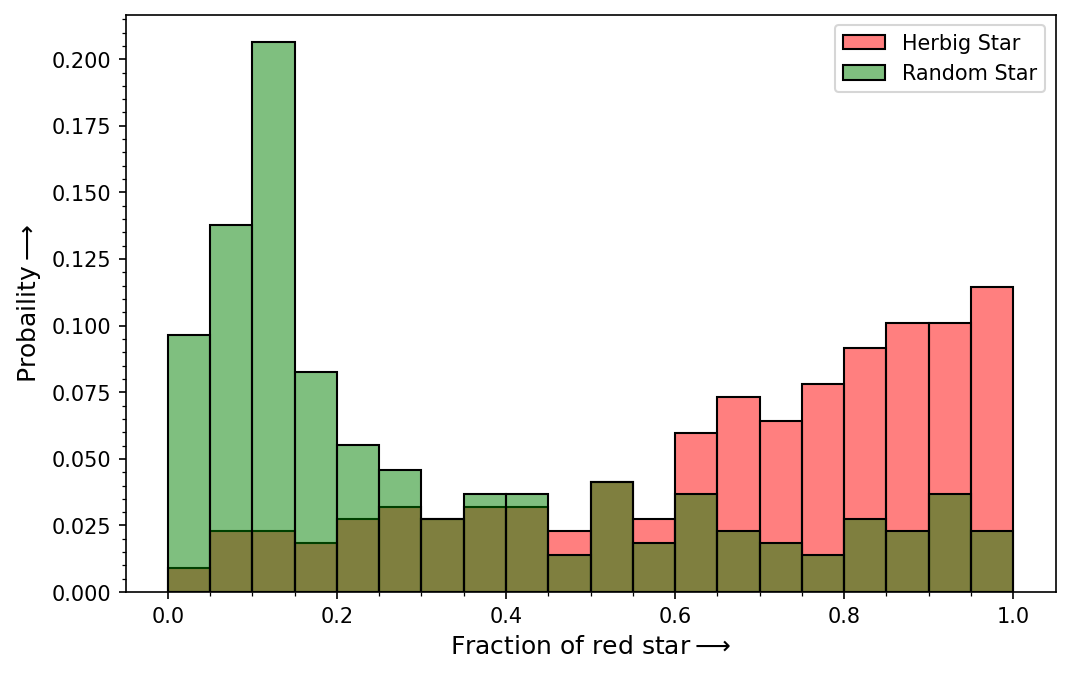

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=1, dpi = 150, figsize = (8, 5), sharex=True)
sn.histplot(frac_herb, bins = bins_range, stat='probability', color='red', alpha = 0.5, label='Herbig Star', element='bars')
sn.histplot(frac_rand, bins = bins_range, stat='probability', color = 'green',alpha = 0.5, label='Random Star', element = 'bars')
ax.legend()
ax.set_ylabel(r"Probaility$\longrightarrow$", fontsize = 12)
ax.set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 12)
# ax.set_title("Probability Distribution of sources with respect to fraction of red object", fontsize = 10)
ax.minorticks_on()
fig.savefig("pdfHerRan.jpg", dpi=600, bbox_inches='tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


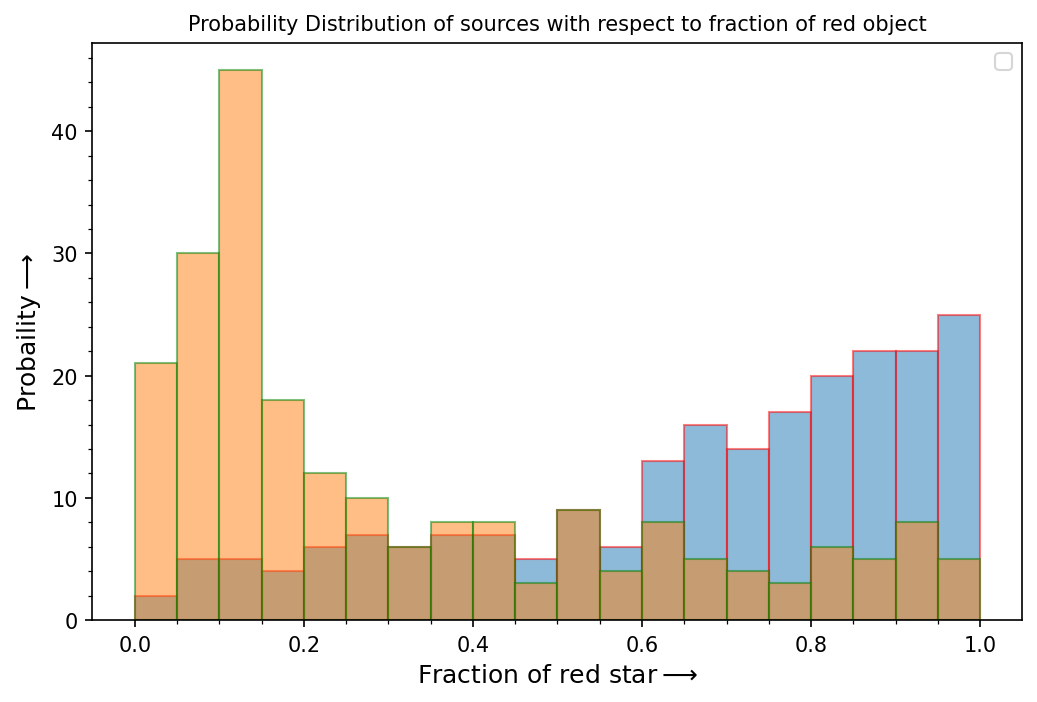

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi = 150, figsize = (8, 5), sharex=True)
# sn.histplot(frac_herb, bins = bins_range, stat='probability', color='red', alpha = 0.5, label='Herbig Star', element='bars')
# sn.histplot(frac_rand, bins = bins_range, stat='probability', color = 'green',alpha = 0.5, label='Random Star', element = 'bars')
ax.hist(frac_herb, bins=bins_range, alpha = 0.5, edgecolor = 'red')
ax.hist(frac_rand, bins=bins_range, alpha = 0.5, edgecolor = 'green')
ax.legend()
ax.set_ylabel(r"Probaility$\longrightarrow$", fontsize = 12)
ax.set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 12)
ax.set_title("Probability Distribution of sources with respect to fraction of red object", fontsize = 10)
ax.minorticks_on()
# fig.savefig("pdfHerRan.jpg", dpi=500)
plt.show()

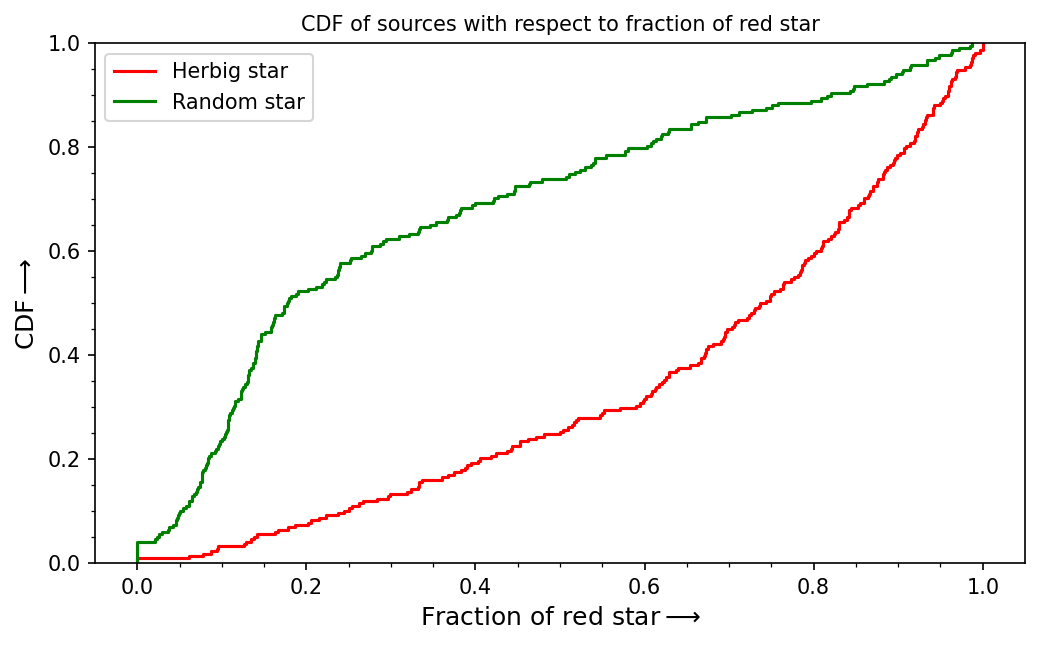

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=1, dpi = 150, figsize = (8, 4.5), sharex=True)
sn.ecdfplot(frac_herb, color = 'red', label='Herbig star')
sn.ecdfplot(frac_rand, color = 'green', label = 'Random star')
ax.legend()
ax.set_title("CDF of sources with respect to fraction of red star", fontsize = 10)

ax.set_ylabel(r"CDF$\longrightarrow$", fontsize = 12)
ax.set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 12)
ax.minorticks_on()
# fig.savefig("cdf2candi.jpg", dpi=600, bbox_inches='tight')
plt.show()

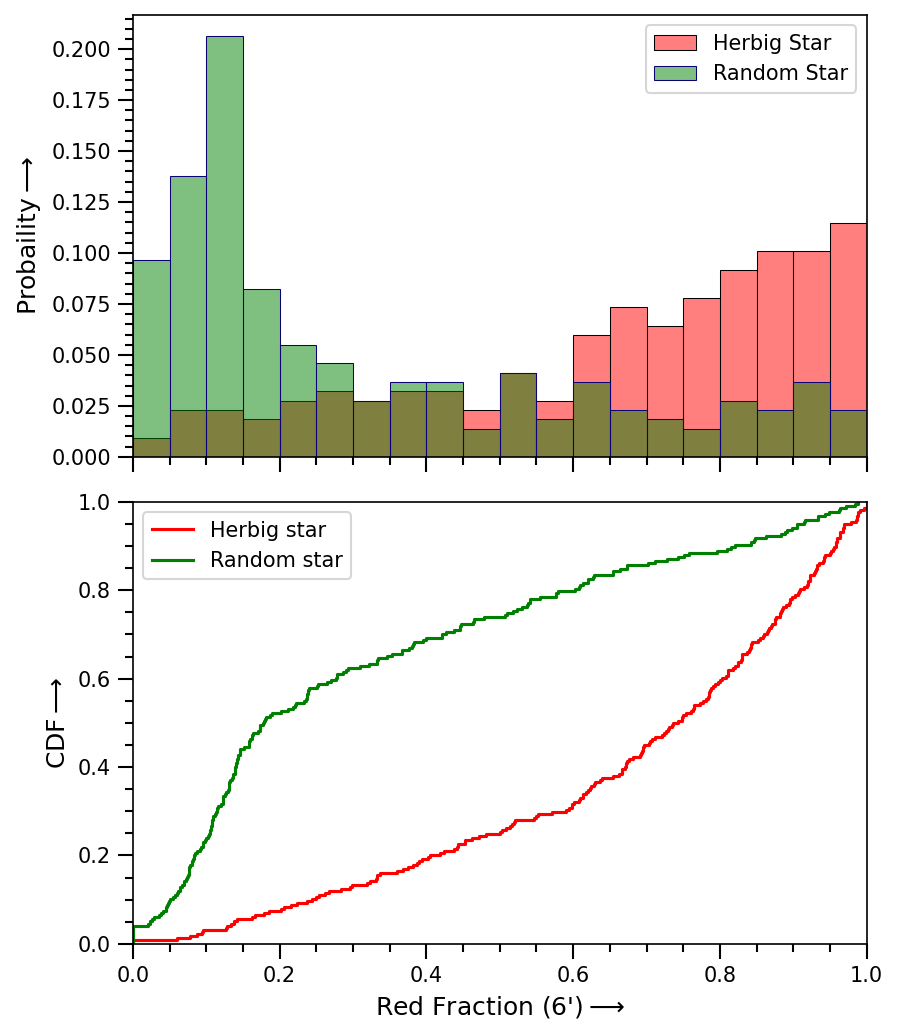

In [ ]:

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, dpi = 150, figsize = (6, 7), sharex=True)
sn.histplot(frac_herb, bins = bins_range, ax=ax1, stat='probability', color='red', alpha = 0.5, label='Herbig Star', element='bars', ec='#000000', linewidth=0.5)
sn.histplot(frac_rand, bins = bins_range, ax=ax1, stat='probability', color = 'green',alpha = 0.5, label='Random Star', element = 'bars', ec='#0B0278', linewidth=0.5)
ax1.legend()
ax1.set_ylabel(r"Probaility$\longrightarrow$", fontsize = 12)
ax2.set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 12)
# ax.set_title("Probability Distribution of sources with respect to fraction of red object", fontsize = 10)
ax1.minorticks_on()
# ax1.set_xbound(0.0, 1.0)

sn.ecdfplot(frac_herb, ax=ax2, color = 'red', label='Herbig star')
sn.ecdfplot(frac_rand, ax=ax2, color = 'green', label = 'Random star')
ax2.legend()
# ax2.set_title("CDF of sources with respect to fraction of red star", fontsize = 10)

ax2.set_ylabel(r"CDF$\longrightarrow$", fontsize = 12)
ax2.set_xlabel(r"Red Fraction (6')$\longrightarrow$", fontsize = 12)
ax2.minorticks_on()

plt.xlim(0.0, 1.0)

ax1.tick_params(which='both', width=1)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4, color='k')

ax2.tick_params(which='both', width=1)
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4, color='k')
ax2.set_xlabel(r"Red Fraction (6')$\longrightarrow$", fontsize = 12)

# fig.savefig("pdfcdfHerRan.jpg", dpi=800, bbox_inches='tight')
plt.show()

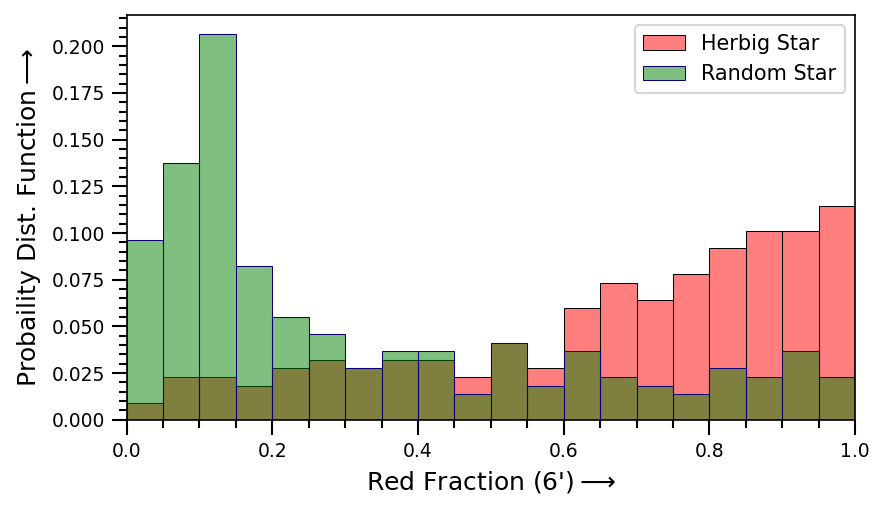

In [ ]:

fig, ax1 = plt.subplots(nrows=1, ncols=1, dpi = 150, figsize = (6, 3.5))
sn.histplot(frac_herb, bins = bins_range, ax=ax1, stat='probability', color='red', alpha = 0.5, label='Herbig Star', element='bars', ec='#000000', linewidth=0.5)
sn.histplot(frac_rand, bins = bins_range, ax=ax1, stat='probability', color = 'green',alpha = 0.5, label='Random Star', element = 'bars', ec='#0B0278', linewidth=0.5)
ax1.legend()
ax1.set_ylabel(r"Probaility Dist. Function$\longrightarrow$", fontsize = 12)
ax1.set_xlabel(r"Red Fraction (6')$\longrightarrow$", fontsize = 12)
# ax.set_title("Probability Distribution of sources with respect to fraction of red object", fontsize = 10)
ax1.minorticks_on()
# ax1.set_xbound(0.0, 1.0)

plt.xlim(0.0, 1.0)

ax1.tick_params(which='both', width=1, labelsize=9)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4, color='k')


fig.tight_layout()
fig.savefig("pdfHerRan.jpg", dpi=800, bbox_inches='tight')
plt.show()

### $\textbf{Data analysis according to bin interval}$

In [ ]:
# Data plotting according to bin


herb_sample = herbig_star[(herbig_star["Dist"] >= herbig_bin[0]) & (herbig_star["Dist"] < herbig_bin[1])]
herb_sample = herb_sample.reset_index(drop=True)
rand_sample = random_star_sample[(random_star_sample["r_med_photogeo"] >= herbig_bin[0]) & (random_star_sample["r_med_photogeo"] < herbig_bin[1])]
rand_sample = rand_sample.reset_index(drop=True)

# --------------------------------------------------------
result_sample = final_result(herb_sample, rand_sample, 6.0)

#--------------------------------------------------------------
before_frac_herb = result_sample[0]
after_frac_herb = result_sample[1]
before_frac_rand = result_sample[2]
after_frac_rand = result_sample[3]



100%|██████████| 33/33 [01:30<00:00,  2.74s/it]


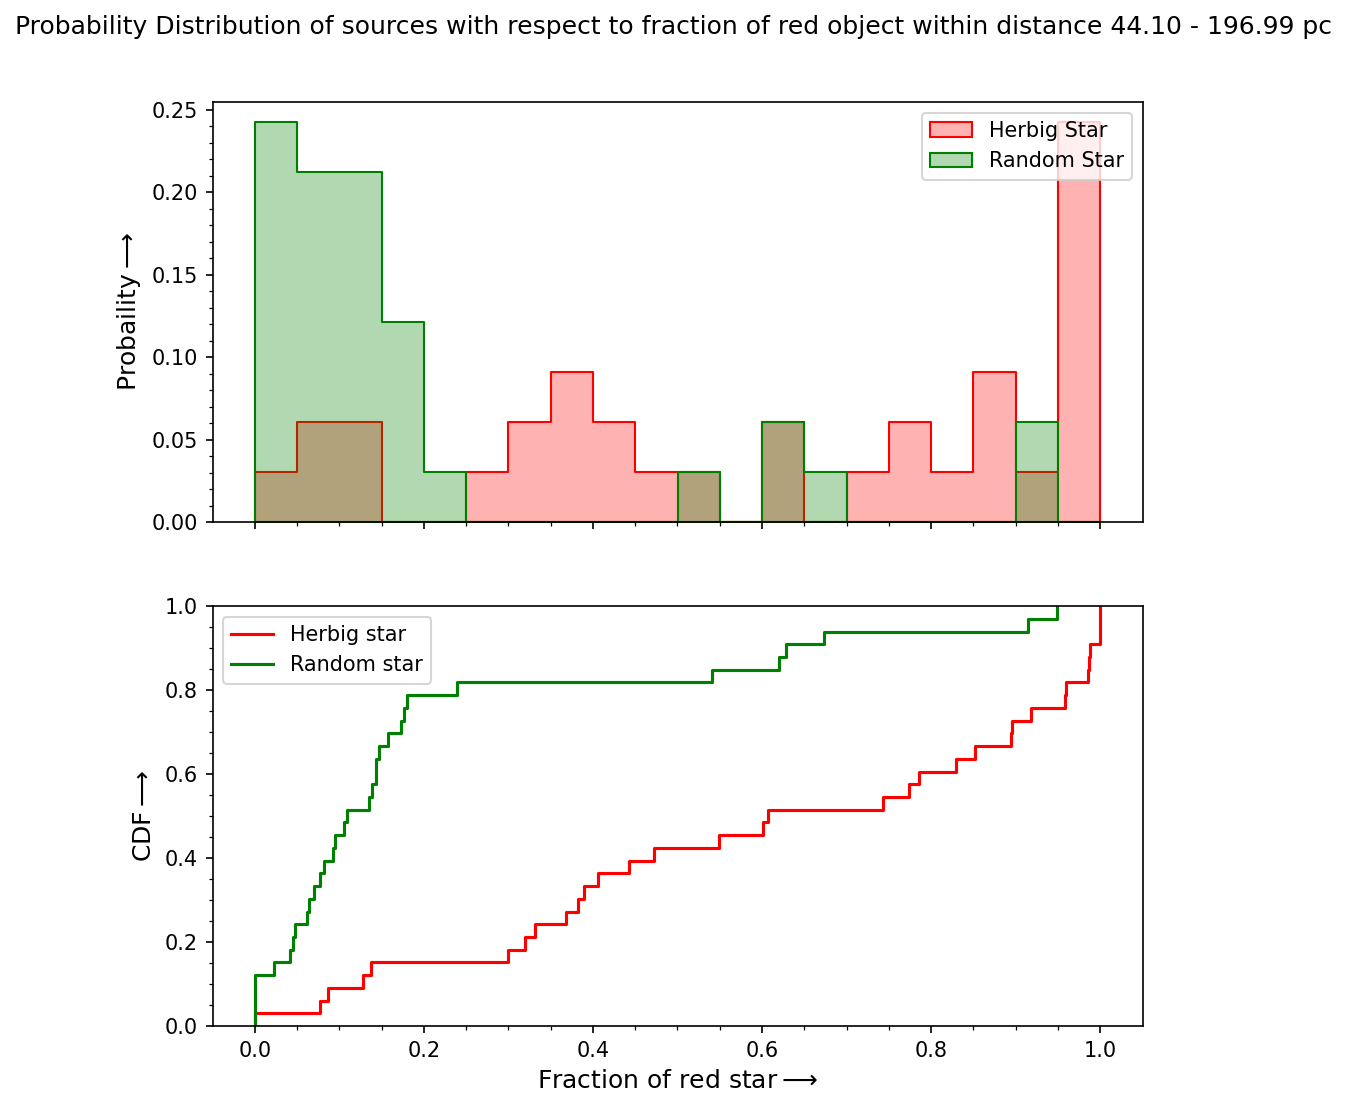

In [ ]:
from cProfile import label

fig, ax = plt.subplots(nrows=2, ncols=1, dpi = 150, figsize = (8, 8), sharex=True)
sn.histplot(before_frac_herb, bins = bins_range, ax=ax[0], stat='probability', color='red', alpha = 0.3, label='Herbig Star', element='step')
sn.histplot(before_frac_rand, bins = bins_range, ax=ax[0], stat='probability', color = 'green',alpha = 0.3, label='Random Star', element = 'step')
ax[0].legend()
ax[0].set_ylabel(r"Probaility$\longrightarrow$", fontsize = 12)
ax[0].set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 12)
ax[0].set_title("Probability Distribution of sources with respect to fraction of red object within distance {:4.2f} - {:4.2f} pc \n \n".format(herbig_bin[0], herbig_bin[1]), fontsize = 12)
ax[0].minorticks_on()
# ax[0].spines['bottom'].set_visible(False)
# ax[0].spines['top'].set_visible(False)


sn.ecdfplot(before_frac_herb, ax=ax[1], color = 'red', label='Herbig star')
sn.ecdfplot(before_frac_rand, ax = ax[1], color = 'green', label = 'Random star')
ax[1].legend()
ax[1].set_ylabel(r"CDF$\longrightarrow$", fontsize = 12)
ax[1].set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 12)
ax[1].minorticks_on()
# ax[1].spines['top'].set_visible(False)
# ax[1].spines['right'].set_visible(False)

plt.show()


In [ ]:
# for i in range(len(max_num_herbig)):
#     # Data plotting according to bin
#     if max_num_herbig[i] != 0:

#         herb_sample = herbig_star[(herbig_star["Dist"] >= herbig_bin[i]) & (herbig_star["Dist"] < herbig_bin[i+1])]
#         herb_sample = herb_sample.reset_index(drop=True)
#         rand_sample = random_star_sample[(random_star_sample["r_med_photogeo"] >= herbig_bin[i]) & (random_star_sample["r_med_photogeo"] < herbig_bin[i+1])]
#         rand_sample = rand_sample.reset_index(drop=True)

#         # --------------------------------------------------------
#         result_sample = final_result(herb_sample, rand_sample, 6.0)

#         #--------------------------------------------------------------
#         before_frac_herb = result_sample[0]
#         after_frac_herb = result_sample[1]
#         before_frac_rand = result_sample[2]
#         after_frac_rand = result_sample[3]

#         #-------------------------------------------------------------

#         # Plotting all posssible outputs

#         from cProfile import label

#         fig, ax = plt.subplots(nrows=2, ncols=1, dpi = 150, figsize = (8, 8), sharex=True)
#         sn.histplot(before_frac_herb, bins = bins_range, ax=ax[0], stat='probability', color='red', alpha = 0.3, label='Herbig Star', element='step')
#         sn.histplot(before_frac_rand, bins = bins_range, ax=ax[0], stat='probability', color = 'green',alpha = 0.3, label='Random Star', element = 'step')
#         ax[0].legend()
#         ax[0].set_ylabel(r"Probaility$\longrightarrow$", fontsize = 8)
#         ax[0].set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 8)
#         ax[0].set_title("Probability Distribution of sources with respect to fraction of red object within distance {:4.2f} - {:4.2f} pc \n \n".format(herbig_bin[i], herbig_bin[i+1]), fontsize = 8)
#         ax[0].minorticks_on()
#         # ax[0].spines['bottom'].set_visible(False)
#         # ax[0].spines['top'].set_visible(False)


#         sn.ecdfplot(before_frac_herb, color = 'red', label='Herbig star')
#         sn.ecdfplot(before_frac_rand, color = 'green', label = 'Random star')
#         ax[1].legend()
#         ax[1].set_ylabel(r"CDF$\longrightarrow$", fontsize = 8)
#         ax[1].set_xlabel(r"Fraction of red star$\longrightarrow$", fontsize = 8)
#         ax[1].minorticks_on()
#         # ax[1].spines['top'].set_visible(False)
#         # ax[1].spines['right'].set_visible(False)

#         plt.show()




In [ ]:
tauri = pd.read_csv('t tauri.csv')
tauri_star = tauri[["Name", "_RA", "_DE", "mag"]]
tauri_star = tauri_star.sort_values(by='mag')
tauri_star = tauri_star.reset_index(drop=True)
tauri_star

,Name,_RA,_DE,mag
0,rho Per,46.29374,38.84053,3.3
1,eta Gem,93.71957,22.50682,3.8
2,chi Cyg,297.64141,32.91415,4.0
3,R Sct,281.87073,-5.70507,4.8
4,NZ Gem,115.51341,14.20853,5.0
...,...,...,...,...
163,RR Boo,221.77413,39.31710,14.1
164,SS Oph,254.46239,-2.76178,14.4
165,RU Aql,303.18675,12.99481,14.5
166,W Dra,271.39421,65.95600,14.5


In [ ]:
tauri_star = tauri_star.sort_values(by='mag')
tauri_star = tauri_star.reset_index(drop=True)

### $\textbf{ Including distance variation of search radius}$

#### defing a function to get the corresponding search radius for a distance star

Assuming "Orion Nebula" as base distance = 412 pc and radius = 12 ly = 3.679 pc, this leads to angular size = 30.7 arcminute.

Our search radius = 6.0 arcminute

In [ ]:
def get_arc_min(dist_star_pc):
    theta_ini = 6.0 # In arcminute
    dist_ini = 412   # In parsec
    theta_star = (dist_ini * theta_ini)/dist_star_pc

    return theta_star       # it returns parallax in arcminute

In [ ]:
def final_result_orion(herbig_star_list, random_star_list):
    


    num_tot_star_her = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
    num_red_star_her = []   # For red object around Herbig Ae/Be star
    num_tot_star_rand = []  # For toatal star around random star
    num_red_star_rand = []  # For red objec around the Random Star

    # After  distance filter

    after_num_tot_star_her = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
    after_num_red_star_her = []   # For red object around Herbig Ae/Be star
    after_num_tot_star_rand = []  # For toatal star around random star
    after_num_red_star_rand = []  # For red objec around the Random Star
    


    for i in range(herbig_star_list.shape[0]):
        herbig_radius = get_arc_min(herbig_star_list["Dist"][i])

        herbig_star = get_gaia_result(1000, herbig_star_list.loc[i][1], herbig_star_list.loc[i][2], herbig_radius/60.0)
        # Filtering out stars on the basis of parallax error
        herbig_star = herbig_star[herbig_star["parallax_error"] < 0.3]
        her_mg = herbig_star["mv"]
        her_gk = herbig_star["phot_g_mean_mag"] - herbig_star["ks_m"]

        # Considering only those sources which lies within the 2*sigma distance error of the main source.

        sigma_herb = (herbig_star_list["e_Dist"][i] + herbig_star_list["E_Dist"][i])/2
        y1 = herbig_star_list["Dist"][i] - 2 *sigma_herb
        y2 = herbig_star_list["Dist"][i] + 2 *sigma_herb

        after_herbig = herbig_star#[herbig_star["dist_frac"] < 0.2]
        after_herbig = after_herbig[(after_herbig["r_med_photogeo"] > y1) & (after_herbig["r_med_photogeo"] < y2)]
        her_mg_af = after_herbig["mv"]
        her_gk_af = after_herbig["phot_g_mean_mag"] - after_herbig["ks_m"]


        
        #-----------------------------------------------------------------------------
        random_radius = get_arc_min(random_star_list["r_med_photogeo"][i])
        rand_star = get_gaia_result(1000, random_star_list.loc[i][1], random_star_list.loc[i][2], random_radius/60.0)
        rand_star = rand_star[rand_star["parallax_error"] < 0.3]
        rand_mg = rand_star["mv"]
        rand_gk = rand_star["phot_g_mean_mag"] - rand_star["ks_m"]

        # -----------------------------------------
        sigma_star = (random_star_list["r_hi_photogeo"][i] - random_star_list["r_lo_photogeo"][i])/2
        x1 = random_star_list["r_med_photogeo"][i] - 2 *sigma_star
        x2 = random_star_list["r_med_photogeo"][i] + 2 *sigma_star
        after_star = rand_star#[rand_star["dist_frac"] < 0.2]
        after_star = after_star[(after_star["r_med_photogeo"] > x1) & (after_star["r_med_photogeo"] < x2)]
    
        rand_mg_af = after_star["mv"]
        rand_gk_af = after_star["phot_g_mean_mag"] - after_star["ks_m"]
        
        #--------------------------------------------------------------------------------

        # y_values1 = np.linspace(1, 4.5, 50)
        # y_values2 = np.linspace(4.5, 8.5, 100)
        # y_values3 = np.linspace(8.5, 14.5, 100)


        # fig, ax = plt.subplots(nrows=1, ncols=1, dpi = 100, figsize = (8, 8))
        # ax.set_xlabel(r"$G - K$", fontsize = 9)
        # ax.set_ylabel("Absolute Magnitude (G)", fontsize = 9)
        # ax.scatter(gk_1m, df.mg, s = 1, alpha = 0.2, c = 'blue')
        # ax.scatter(her_gk, her_mg, s = 5, c = 'red', label = 'HAeBe Star')
        # ax.scatter(rand_gk, rand_mg, s = 5, c = 'black', label = 'Random Star')
        # # plotting the boundries using the eqaution of straight line
        # ax.plot(equation1(y_values1), y_values1,  color = 'orange')
        # ax.plot(equation2(y_values2), y_values2,  color = 'orange')
        # ax.plot(equation3(y_values3), y_values3, color = 'orange')
        # ax.minorticks_on()
        # # ax.grid(True)
        # ax.legend(fontsize = 8)
        # ax.set_ylim(max(df.mg)+1, min(her_mg) -1)
        # plt.show()
        """ Counting Red Object around a Herbig Ae/Be Star"""

        her_red_star = counting_fun(her_mg, her_gk)

        num_tot_star_her.append(len(her_mg))
        num_red_star_her.append(her_red_star)


        af_her_red = counting_fun(her_mg_af, her_gk_af)
        after_num_tot_star_her.append(len(her_mg_af))
        after_num_red_star_her.append(af_her_red)


        """ Counting Red Object around a Random Star"""
        
        rand_red_star = counting_fun(rand_mg, rand_gk)
        num_tot_star_rand.append(len(rand_mg))
        num_red_star_rand.append(rand_red_star)


        af_star_red = counting_fun(rand_mg_af, rand_gk_af)
        after_num_tot_star_rand.append(len(rand_mg_af))
        after_num_red_star_rand.append(af_star_red)



    #-----------------------------------------------------------------------------

    # Creating list for storing the fractional values of red star after and before the distance filter

    frac_before_herb = []
    frac_before_rand = []
    frac_after_herb = []
    frac_after_rand = []

    for i in range(len(num_red_star_her)):

        # THIS IS FOR HERBIG STARS
        if num_tot_star_her[i] == 0:
            f1 = 0.0
            frac_before_herb.append(f1)

        else:
            f1 = num_red_star_her[i]/num_tot_star_her[i]
            frac_before_herb.append(f1)
        


        if after_num_tot_star_her[i] == 0:
            f1 = 0.0
            frac_after_herb.append(f1)
        
        else:
            f1 = after_num_red_star_her[i]/after_num_tot_star_her[i]
            frac_after_herb.append(f1)


        # THIS IS FOR RANDOM STAR

        if num_tot_star_rand[i] == 0:
            f1 = 0.0
            frac_before_rand.append(f1)

        else:
            f1 = num_red_star_rand[i]/num_tot_star_rand[i]
            frac_before_rand.append(f1)
        


        if after_num_tot_star_rand[i] == 0:
            f1 = 0.0
            frac_after_rand.append(f1)
        
        else:
            f1 = after_num_red_star_rand[i]/after_num_tot_star_rand[i]
            frac_after_rand.append(f1)

    
    her_avg_frac_bf = np.average(frac_before_herb)
    her_avg_frac_af = np.average(frac_after_herb)

    rnd_avg_frac_bf = np.average(frac_before_rand)
    rnd_avg_frac_af = np.average(frac_after_rand)


    # fig, ax = plt.subplots(dpi = 300)
    # ax.set_xlabel(r"Distance (in pc)$\longrightarrow$", fontsize = 8)
    # ax.set_ylabel(r"Fraction of red star$\longrightarrow$", fontsize = 8)
    
    # ax.plot(random_star_list["r_med_photogeo"], frac_before_rand, '--', marker = "*", linewidth = 0.8, markersize = 5, label = "Random before", alpha = 0.6)
    # ax.plot(random_star_list["r_med_photogeo"], frac_after_rand, "-.", marker = "^", linewidth = 0.8, markersize = 5, label = "Random after", alpha = 0.6)
    # ax.hlines(y=rnd_avg_frac_bf, xmin=500, xmax= 1000, color = 'orange')
    # ax.hlines(y=rnd_avg_frac_af, xmin=500, xmax= 1000, color='yellow')



    # ax.plot(herbig_star_list["Dist"], frac_before_herb, marker = "D", linewidth = 0.8, markersize = 4, label = "Herbig before", alpha = 0.5)
    # ax.plot(herbig_star_list["Dist"], frac_after_herb, marker = "o", linewidth = 0.8, markersize = 5, label = "Herbig after", alpha = 0.5)
    # ax.hlines(y=her_avg_frac_bf, xmin=500, xmax= 1000, color = 'red')
    # ax.hlines(y=her_avg_frac_af, xmin=500, xmax= 1000, color='green')
    # ax.legend(fontsize = 6)
    # # ax.set_xscale("log")
    # ax.minorticks_on()
    # ax.set_title("""Plot of fraction of red star vs distance.\n Comparison in between before and after applying the "error in distance" filter \n Serach radius = {} arcminute""".format(rad_arcmin), fontsize = 8)
    # plt.show()


    return frac_before_herb, frac_after_herb, frac_before_rand, frac_after_rand

    

In [ ]:
groot = final_result_orion(herbig_star, random_star_sample)

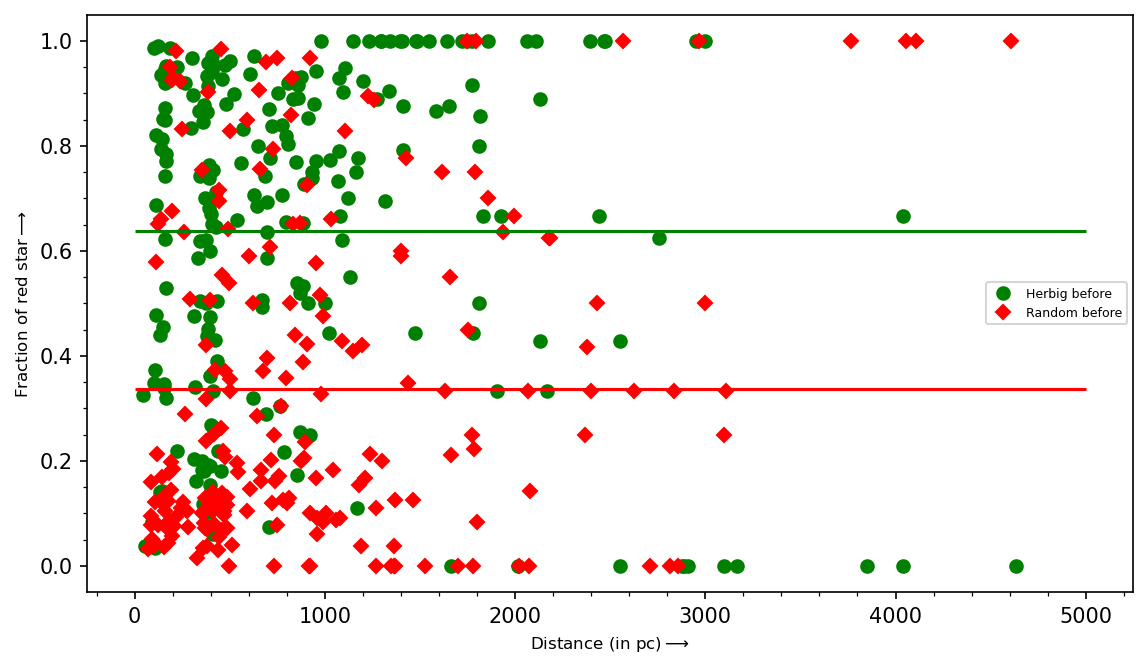

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize = (9, 5))
ax.plot(herbig_star["Dist"], groot[0], linestyle = ' ', marker = "o", color = 'green', label = 'Herbig before')
#ax.plot(herbig_star["Dist"], groot[1], linestyle = 'dotted', marker = "s", color = 'purple', label = 'Herbig after')


ax.plot(random_star_sample["r_med_photogeo"], groot[2], linestyle = ' ', marker = "D",markersize = 5, color = 'red', label = 'Random before')
#ax.plot(random_star_sample["r_med_photogeo"], groot[3], linestyle = '-.', marker = "*", color = 'blue', label = 'Random after')

ax.set_xlabel(r"Distance (in pc)$\longrightarrow$", fontsize = 8)
ax.set_ylabel(r"Fraction of red star$\longrightarrow$", fontsize = 8)
ax.hlines(np.average(groot[0]), xmin=0, xmax=5000, color = 'green')
ax.hlines(np.average(groot[2]), xmin=0, xmax=5000, color = 'red')
ax.legend(fontsize = 6)
ax.minorticks_on()
plt.show()

### $\textbf{T TAURI}$

In [ ]:
def final_result_tauri(t_tauri_star_list, search_radius):
    

    def list_red_object(radius):

        num_tot_star_tau = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
        num_red_star_tau = []   # For red object around Herbig Ae/Be star
        
        


        for i in range(t_tauri_star_list.shape[0]):

            t_tauri = get_gaia_result(1000, t_tauri_star_list.loc[i][1], t_tauri_star_list.loc[i][2], radius)
            # Filtering out stars on the basis of parallax error
            t_tauri = t_tauri[t_tauri["parallax_error"] < 0.3]
            tau_mg = t_tauri["mv"]
            tau_gk = t_tauri["phot_g_mean_mag"] - t_tauri["ks_m"]

            
            #--------------------------------------------------------------------------------

            
            """ Counting Red Object around a T-Tauri Star"""

            tau_red_star = counting_fun(tau_mg, tau_gk)

            num_tot_star_tau.append(len(tau_mg))
            num_red_star_tau.append(tau_red_star)


        return num_red_star_tau, num_tot_star_tau

    rad_arcmin = search_radius
    all_list = list_red_object(rad_arcmin/60.0)
    
    # -----------------------------------------------------------------------
    num_red_star_her = all_list[0]
    num_tot_star_her = all_list[1]
    


    #-----------------------------------------------------------------------------

    # Creating list for storing the fractional values of red star after and before the distance filter

    tauri_red_frac = []


    for i in range(len(num_red_star_her)):

        # THIS IS FOR HERBIG STARS
        if num_tot_star_her[i] == 0:
            f1 = 0.0
            tauri_red_frac.append(f1)

        else:
            f1 = num_red_star_her[i]/num_tot_star_her[i]
            tauri_red_frac.append(f1)
        

    return tauri_red_frac
